## Assignement in Data Driven optimization

Name: Darix SAMANI SIEWE

## 2a) Use the MatlplotLib to generate a 3D plot of the function.

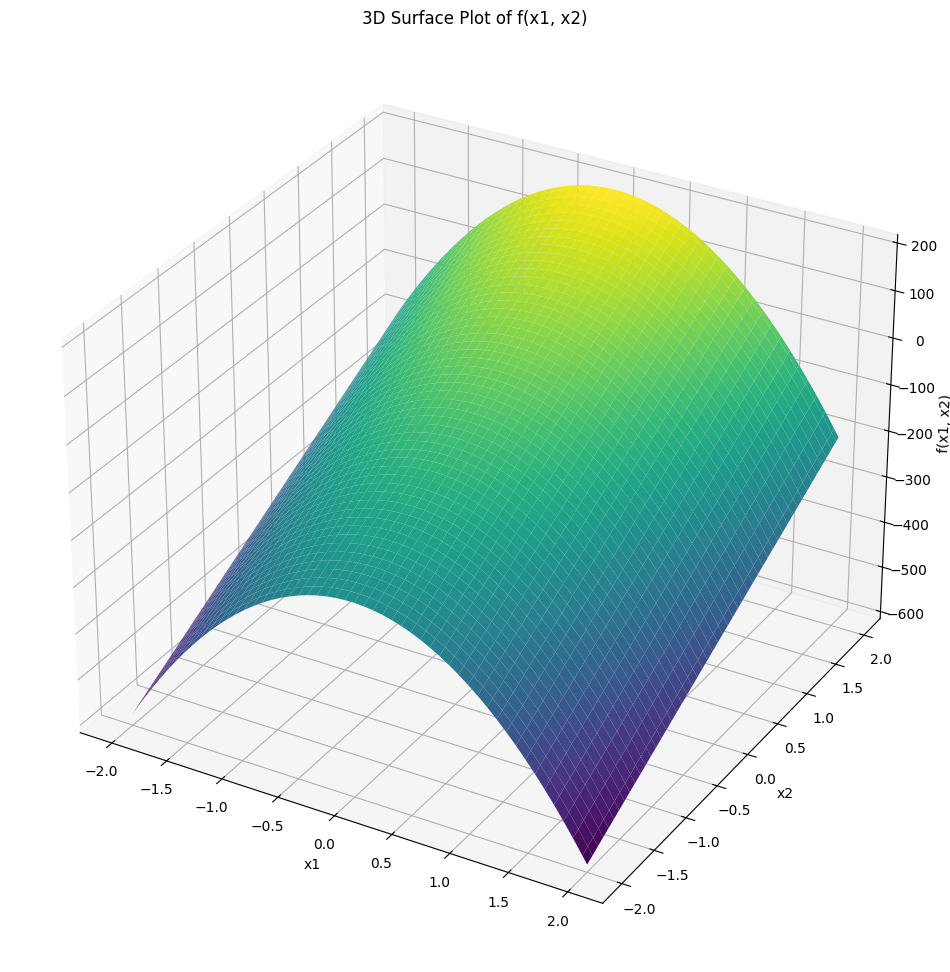

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function(x1, x2):
    return 100 * (x2 - x1**2) + (1 - x1)**2


x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)


Z = function(X1, X2)


fig = plt.figure(figsize=(12, 22))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D Surface Plot of f(x1, x2)')

plt.show()

### 2b) Generate a contour plot of f

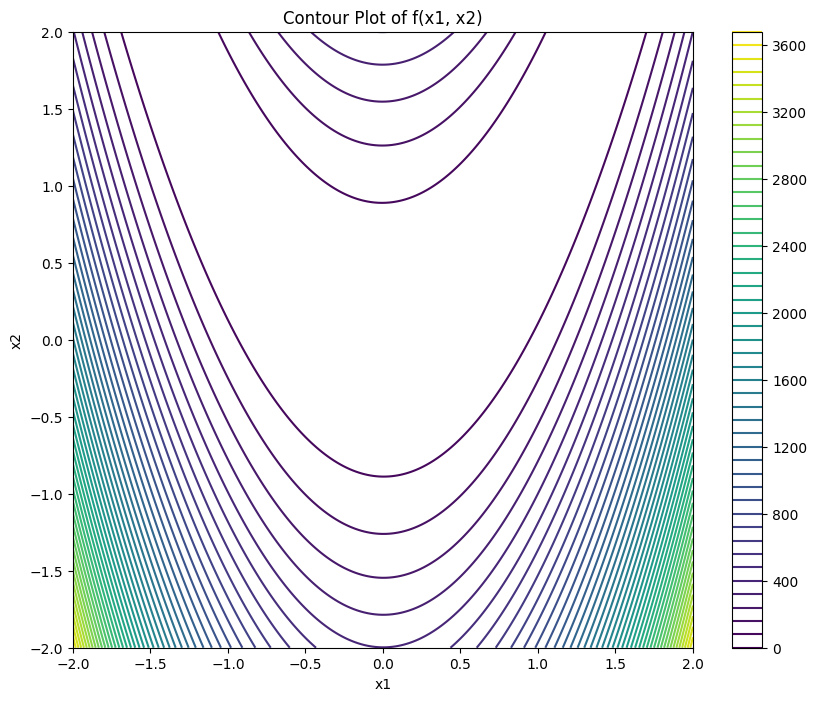

In [107]:
import numpy as np
import matplotlib.pyplot as plt


def function(x1, x2):
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2


x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)


Z = function(X1, X2)

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, 50, cmap='viridis')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of f(x1, x2)')

plt.colorbar()
plt.show()

2c) Determine the gradient of f(x) using Autograd under pyTorch.

In [108]:
import torch

def function(x1, x2):
    return 100 * (x2 - x1**2) + (1 - x1)**2


x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)


z = function(x1, x2)

z.backward()

print(f"Gradient with respect to x1: {x1.grad}")
print(f"Gradient with respect to x2: {x2.grad}")

Gradient with respect to x1: -200.0
Gradient with respect to x2: 100.0


2e) Is f a convex function?

In order to determine if the function is convex we need to calclaute the hessian matrix and check if it's semi positive defined


In [109]:
from torch.autograd.functional import hessian

def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

x = torch.tensor([1.0, 1.0], requires_grad=True)
hessian_matrix = hessian(f, x)
print(hessian_matrix)

tensor([[ 802., -400.],
        [-400.,  200.]])


Convexity and Semi-Positive Definiteness

- To determine if the function is convex at a given point, you need to check if the Hessian matrix is semi-positive definite at that point.
- A matrix is semi-positive definite if all of its eigenvalues are non-negative, or equivalently if the matrix satisfies:
- All leading principal minors are non-negative.

We can check if the matrix is semi-positive definite by calculating its eigenvalues or principal minors. Let's do both checks here.

To check if the Hessian is semi-positive definite, you can compute its eigenvalues. If all eigenvalues are non-negative, the matrix is semi-positive definite.

The eigenvalues $λ_1$ and $λ_2$ of the Hessian matrix can be computed from the characteristic equation:

$det(H-λI) = 0$

We calculate the eigenvlaues numerically and we obtain 1000 and 2, both of which are positive real numbers. Since both eigenvalues are positive, the Hessian matrix is positive definite at the point $x=[1.0,1.0]$. This means the function is locally convex at that point.

3. In the following we use an image of Timbuktu (see the google drive of the course to find the image)

# 3a) Convert the colored image into a gray-level image.
# Load a colored image

in this section we just draw our image and loading it

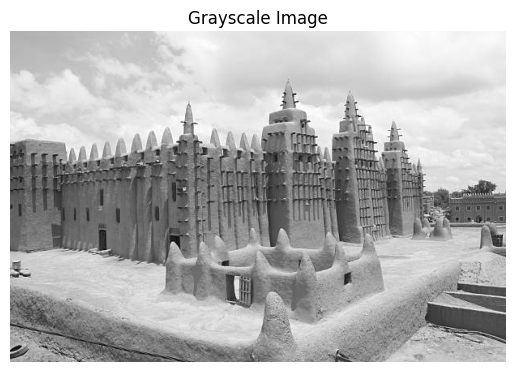

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./Timbuktu.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# 3b) Read the grey-level values into a matrix
# The grey-level values are now stored in the gray_image matrix.

In [112]:
gray_matrix = np.array(gray_image)

print("Grayscale Matrix:\n", gray_matrix)

Grayscale Matrix:
 [[177 177 177 ... 243 243 243]
 [177 177 177 ... 243 243 243]
 [177 177 177 ... 244 244 244]
 ...
 [162 155 154 ... 197 199 199]
 [189 195 186 ... 194 197 197]
 [160 166 159 ... 192 195 194]]


# 3c) Determine the SVD of the matrix

In [113]:
U, S, VT = np.linalg.svd(gray_matrix, full_matrices=False)

print("U Shape:", U.shape)
print("S Shape:", S.shape)
print("VT Shape:", VT.shape)

U Shape: (408, 408)
S Shape: (408,)
VT Shape: (408, 612)


# 3d) Image Compression using SVD

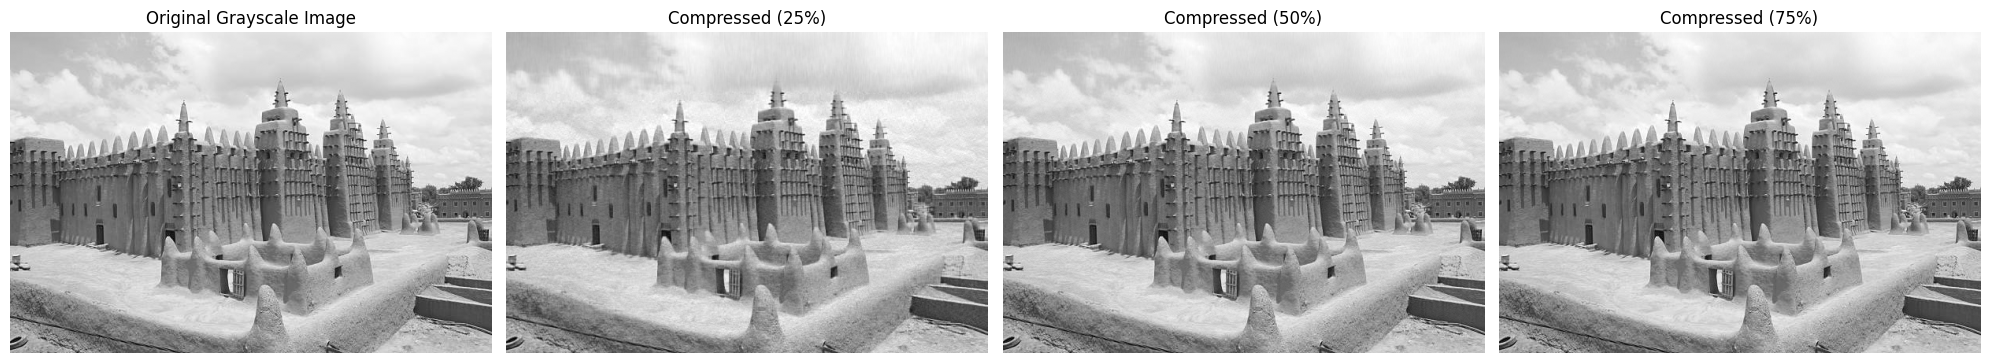

In [115]:

def reconstruct_image(U, S, VT, percentage):
    """
    This function help us the compressed an image given its single value decomposition (SVD) and the percentage of compression
    """
    k = int(len(S) * percentage)

    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]

    compressed_image = np.dot(U_k, np.dot(S_k, VT_k))

    compressed_image = np.clip(compressed_image, 0, 255)

    return compressed_image

# proportion  25%
compressed_25 = reconstruct_image(U, S, VT, 0.25)

# proportion  50%
compressed_50 = reconstruct_image(U, S, VT, 0.50)

# proportion  50%
compressed_75 = reconstruct_image(U, S, VT, 0.75)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# plot the original Image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

# plot the 25% Compression
axes[1].imshow(compressed_25, cmap='gray')
axes[1].set_title('Compressed (25%)')
axes[1].axis('off')

# plot the 50% Compression
axes[2].imshow(compressed_50, cmap='gray')
axes[2].set_title('Compressed (50%)')
axes[2].axis('off')

# plot the 75% Compression
axes[3].imshow(compressed_75, cmap='gray')
axes[3].set_title('Compressed (75%)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

Based on the image above, we can see that increasing the compression ratio reduces the quality of the image. One of our recommendations is to write a function that, given an image, can find the optimal compression ratio without sacrificing image quality. This approach is more efficient because it doesn't require human intervention.

4. You are provided with the dataset vehicle.csv in our google drive.

4a) Use a Jupyter notebook to upload the dataset.

In [116]:
import pandas as pd

df = pd.read_csv("./vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


4b) Perform the principal-component analysis of the data-set (N.B.:- drop the last column from
the dataset).

In order to calculate the principal component analysis, we need to follow the steps below.

- Standardize the data
- Calculate the covariance matrix
- Calculate the eigenvectors and the eigenvalues of the covariance matrix
- Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvector

### Standardize the data

The process of standardization is done by subtracting the mean and dividing by the standard deviation for each feature. in this step we standarze the the features of our dataset.

In [117]:
from sklearn.preprocessing import StandardScaler


features = df.drop('class', axis=1)  # drop the target variable

features.fillna(features.mean(), inplace=True)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

## Calculate the covariance matrix

The covariance matrix tell us how each features are correlted to each others.

In [118]:

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(standardized_data.T)
print(cov_matrix.shape)
#print('Covariance Matrix \n%s', cov_matrix)

(18, 18)


Step 3: Calculate the eigenvalues and eigenvectors

Given our covariance matrix in this step we need to calculate the eigen value and eigen vector of our covariance matrix. Eigenvectors represent the direction of the principal components, and eigenvalues represent the magnitude of the variance in that direction.

In [119]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(len(eigenvalues))
print(eigenvectors.shape)

18
(18, 18)


In [127]:
sorted_indices = np.argsort(eigenvalues)[::-1]

sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]


In [122]:
# Cumulative Variance Explained:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.20648509  68.94253893  79.50492134  86.05424114  91.14362968
  94.13608733  96.12576859  97.35576702  98.24380605  98.75272648
  99.12215143  99.377159    99.57360642  99.72181774  99.83484544
  99.93162764  99.98286462 100.        ]


Cumulative Variance Explained: [ 52.20648509  68.94253893  79.50492134  86.05424114  91.14362968
  94.13608733  96.12576859  97.35576702  98.24380605  98.75272648
  99.12215143  99.377159    99.57360642  99.72181774  99.83484544
  99.93162764  99.98286462 100.        ]
Number of principal components that explain at least 95% variance: 7


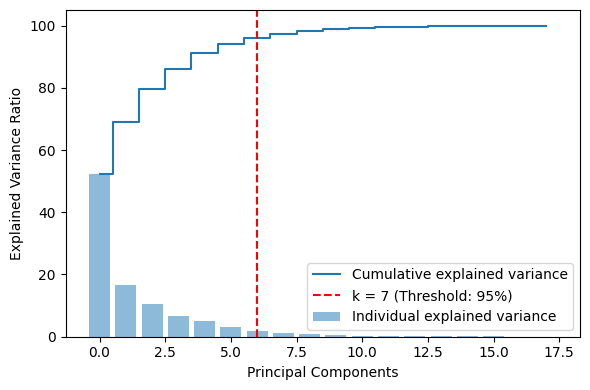

In [123]:
import numpy as np
import matplotlib.pyplot as plt

tot = sum(eigenvalues)
var_exp = [(i / tot) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


print("Cumulative Variance Explained:", cum_var_exp)


threshold = 95
k = np.argmax(cum_var_exp >= threshold) + 1
print(f"Number of principal components that explain at least {threshold}% variance: {k}")

# Summary Plot of the Cumulative Variance Explained:
plt.figure(figsize=(6, 4))
plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.axvline(x=k-1, color='r', linestyle='--', label=f'k = {k} (Threshold: {threshold}%)')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Obtain the Principal Component

In [124]:
k = 7
top_k_eigenvectors = sorted_eigenvectors[:, :k]

Project Data onto Principal Components

In [125]:
principal_components = standardized_data.dot(top_k_eigenvectors)

4b) What are the principal-components?



In [126]:
import numpy as np
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(features)


components = pca.components_

top_k_components = components[:k]


print(f"Top {k} Principal Components:")
print(top_k_components)

Top 7 Principal Components:
[[ 3.60471829e-02  2.78416913e-02  7.53126652e-02  1.31532530e-01
   4.71828131e-03  3.98208081e-03  1.76880624e-01 -4.01422254e-02
   1.37184017e-02  6.25157100e-02  1.60052966e-01  9.44697471e-01
   1.40485722e-01 -5.67733845e-04  2.08245628e-03  9.44378632e-03
   3.69669682e-04  4.41277792e-03]
 [ 5.18548219e-02 -2.18352925e-02  1.09327072e-01  8.56561998e-01
   2.42584119e-01  8.19058775e-02  7.62614537e-03 -3.85807591e-02
  -2.69334189e-03 -6.02106375e-02  1.65003903e-01 -1.20954202e-01
  -2.58190028e-01 -9.76128121e-02 -8.29962275e-03  4.90734123e-02
   1.53529450e-01  1.90666362e-01]
 [-3.47094024e-02  1.22648333e-01  2.09786621e-02  2.26480425e-01
   1.48917356e-01  7.89989461e-02 -2.24263564e-03 -1.10868363e-02
  -1.08946929e-03  2.66691009e-01  1.33175384e-01 -2.00805539e-01
   8.47556483e-01  1.24257045e-01  3.27640638e-02 -1.68379721e-01
  -7.63346095e-02 -7.24304991e-02]
 [-1.65972910e-01 -9.10326949e-02 -2.72396448e-01  6.27228388e-04
   1.8861